## Content

- [Kaggle Data Download & Description Checking](#Kaggle-Data-Download-&-Description-Checking)

- [Imports](#Imports)

- [Data Load](#Data-Load)

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    - [a. Missing Values](#a.-Missing-Values)

    - [b. Class Distribution](#-b.-Class-Distribution)

    - [c. Class vs Time Distribution](#c.-Class-vs-Time-Distribution)

    - [d. Class vs Amount Distribution](#d.-Class-vs-Amount-Distribution)

    - [e. Feature Correlation](#e.-Feature-Correlation)

- [Moving Forward](#Moving-Forward)

### Kaggle Data Download & Description Checking

In [ ]:
import kaggle

kaggle.api.authenticate()

In [ ]:
print(kaggle.api.dataset_list_files('mlg-ulb/creditcardfraud').files)

In [ ]:
kaggle.api.dataset_download_files('mlg-ulb/creditcardfraud', path='.', unzip=True)

In [ ]:
kaggle.api.dataset_metadata('mlg-ulb/creditcardfraud', path='.')

In [1]:
import json

# Load the JSON file
with open('dataset-metadata.json', 'r') as f:
    data = json.load(f)

# Closing file
f.close()

# Convert the whole stringified JSON to a Dictionary
pretty_json = json.loads(data)

pretty_json

{'datasetId': 310,
 'datasetSlug': 'creditcardfraud',
 'ownerUser': '',
 'usabilityRating': 0.8529411764705882,
 'totalViews': 11935010,
 'totalVotes': 12343,
 'totalDownloads': 931266,
 'title': 'Credit Card Fraud Detection',
 'subtitle': 'Anonymized credit card transactions labeled as fraudulent or genuine',
 'description': "Context\n---------\n\nIt is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.\n\nContent\n---------\n\nThe dataset contains transactions made by credit cards in September 2013 by European cardholders. \nThis dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.\n\nIt contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality iss

In [2]:
from IPython.display import Markdown, display

# Display as markdown
display(Markdown(f'{pretty_json['description']}\n\nCollaborators\n---------\n\nUserName:\t{pretty_json['collaborators'][0]['username']}\n\nRole:\t{pretty_json['collaborators'][0]['role']}'))

Context
---------

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
---------

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)
---------

A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

Acknowledgements
---------

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on [https://www.researchgate.net/project/Fraud-detection-5][1] and the page of the [DefeatFraud][2] project

Please cite the following works: 

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca  Bontempi. [Calibrating Probability with Undersampling for Unbalanced  Classification.][3] In Symposium on Computational Intelligence and Data  Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca.  [Learned lessons in credit  card fraud detection from a practitioner perspective][4], Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi,  Cesare; Bontempi, Gianluca. [Credit card fraud detection: a realistic modeling and a novel learning strategy,][5]  IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea [Adaptive Machine learning for credit card fraud detection][6] ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. [Scarff: a scalable  framework for streaming credit card fraud detection with Spark][7], Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. [Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization,][8] International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi [Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection),  INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi [Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection ](https://www.researchgate.net/publication/333143698_Combining_Unsupervised_and_Supervised_Learning_in_Credit_Card_Fraud_Detection) Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi [Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook ](https://www.researchgate.net/publication/351283764_Machine_Learning_for_Credit_Card_Fraud_Detection_-_Practical_Handbook) 

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi [Incremental learning strategies for credit cards fraud detection](https://www.researchgate.net/publication/352275169_Incremental_learning_strategies_for_credit_cards_fraud_detection),  IInternational Journal of Data Science and Analytics

  [1]: https://www.researchgate.net/project/Fraud-detection-5
  [2]: https://mlg.ulb.ac.be/wordpress/portfolio_page/defeatfraud-assessment-and-validation-of-deep-feature-engineering-and-learning-solutions-for-fraud-detection/
  [3]: https://www.researchgate.net/publication/283349138_Calibrating_Probability_with_Undersampling_for_Unbalanced_Classification
  [4]: https://www.researchgate.net/publication/260837261_Learned_lessons_in_credit_card_fraud_detection_from_a_practitioner_perspective
  [5]: https://www.researchgate.net/publication/319867396_Credit_Card_Fraud_Detection_A_Realistic_Modeling_and_a_Novel_Learning_Strategy
  [6]: http://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf
  [7]: https://www.researchgate.net/publication/319616537_SCARFF_a_Scalable_Framework_for_Streaming_Credit_Card_Fraud_Detection_with_Spark
  
[8]: https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection

Collaborators
---------

UserName:	dalpozz

Role:	ADMIN

### Imports

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 100)

df = pd.read_csv('creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### a. Missing Values

In [ ]:
# Check for missing values

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### b. Class Distribution

In [7]:
# Count of classes (0: Normal, 1: Fraud)

count_classes = pd.Series(df['Class']).value_counts(sort = True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

In [30]:
# Get the Fraud & Normal dataset 

fraud_df    = df[df['Class']==1]
normal_df   = df[df['Class']==0]
print(fraud_df.shape, normal_df.shape)
print(f"Fraud-to-Normal transaction: {fraud_df.shape[0]/normal_df.shape[0]}")

(492, 31) (284315, 31)
Fraud-to-Normal transaction: 0.0017304750013189597


#### c. Class vs Time Distribution

In [41]:
# Time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour

df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
time_df = pd.DataFrame(tmp)
time_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
time_df.tail(10)

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
84,43.0,0,0.00,4465.04,7643,583174.35,76.301760,17.880,40603.703791
85,43.0,1,0.77,187.11,12,312.44,26.036667,3.520,3275.115915
86,44.0,0,0.00,3789.80,7766,561529.91,72.306195,17.120,35829.927811
87,44.0,1,0.38,296.00,10,637.16,63.716000,4.795,9959.865493
88,45.0,0,0.00,4323.08,7806,532677.25,68.239463,15.000,32292.133523
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6458,449369.58,69.583397,15.000,132269.354973
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4852,333212.69,68.675328,14.000,56123.940988
93,47.0,1,0.76,245.00,4,366.18,91.545000,60.210,11459.760833


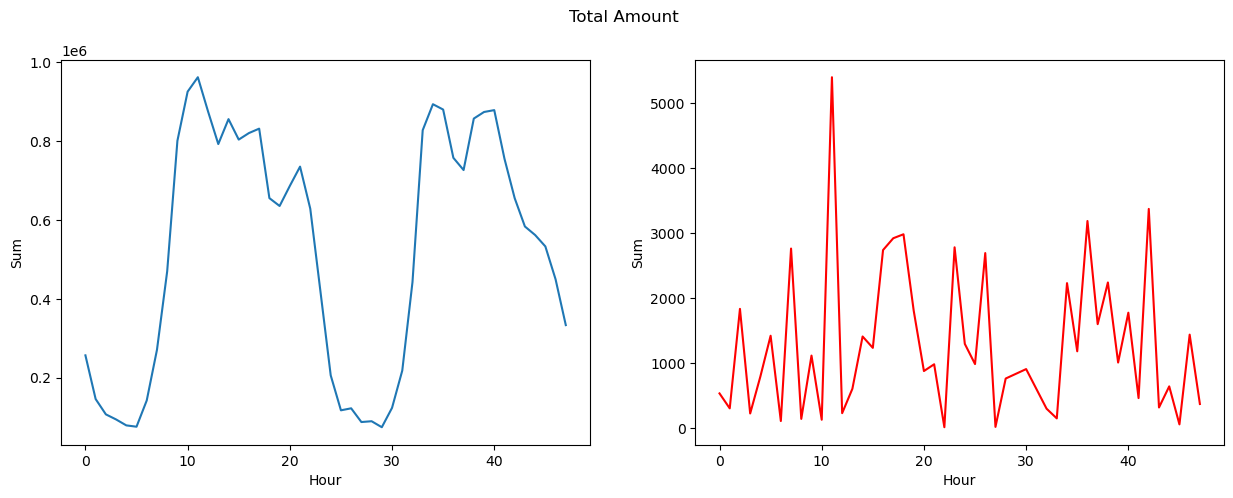

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=time_df.loc[time_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=time_df.loc[time_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

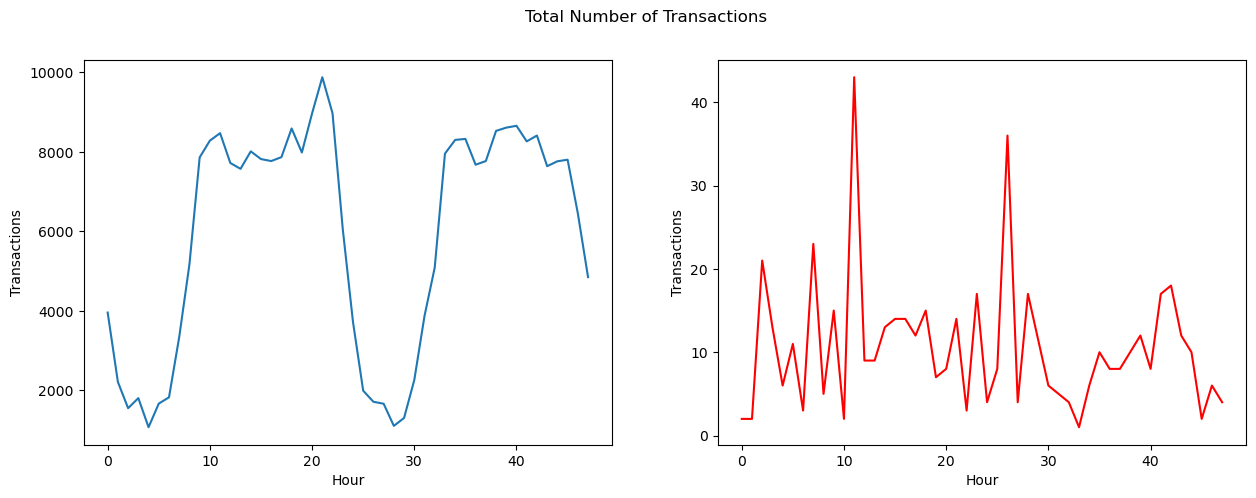

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=time_df.loc[time_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=time_df.loc[time_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

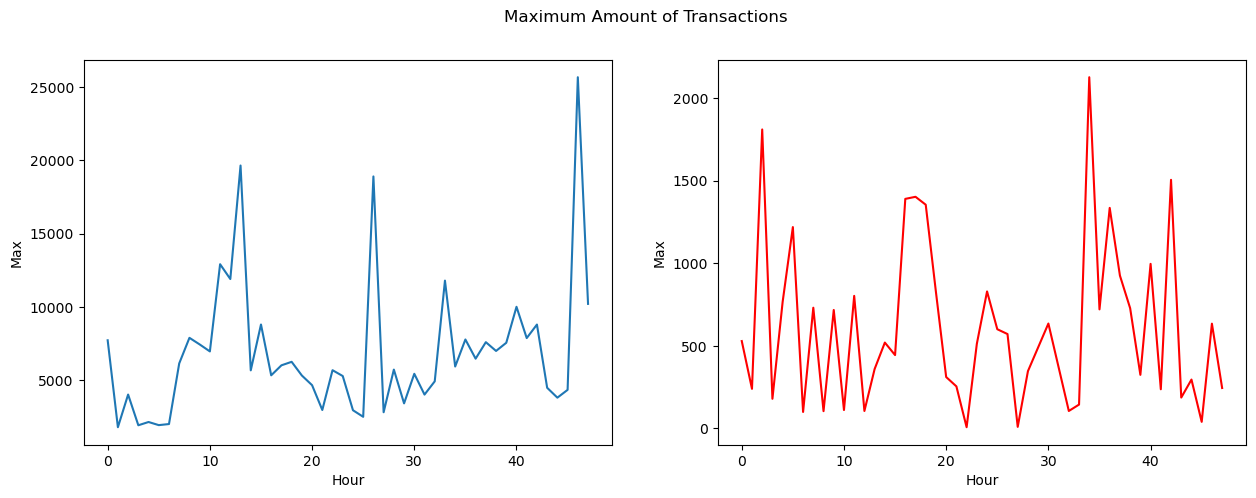

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=time_df.loc[time_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=time_df.loc[time_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

In [ ]:
# Time series decomposition

tdf0 = time_df[time_df['Class'] == 0]
tdf0.set_index("Hour", inplace=True)
tdf0.head()

,Class,Min,Max,Transactions,Sum,Mean,Median,Var
Hour,,,,,,,,
0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.99,45615.821201
1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.82,20053.615770
2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.90,45355.430437
3.0,0,0.0,1903.26,1808,94086.79,52.039154,15.95,16741.786661
4.0,0,0.0,2126.13,1076,79050.36,73.466877,15.95,24416.863654


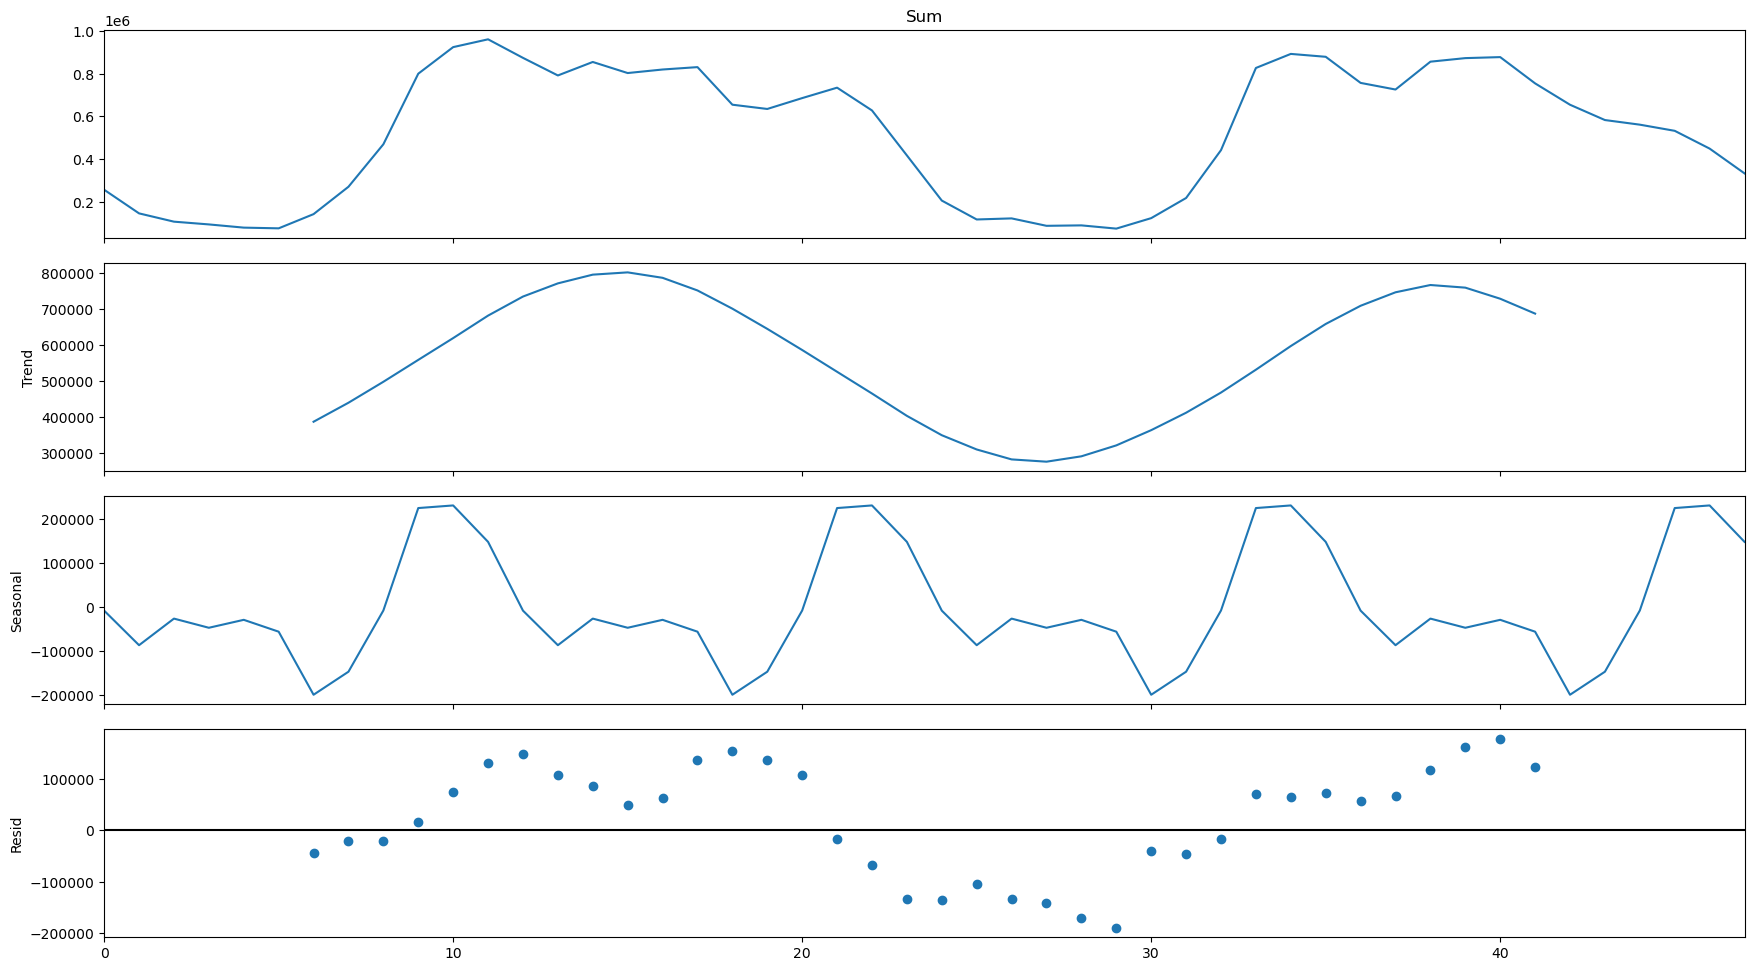

In [ ]:
decomp = seasonal_decompose(tdf0['Sum'],
                                   model='additive',
                                   period=12)
fig = decomp.plot()
fig.set_size_inches(18, 10)
plt.show()

In [ ]:
# Time series decomposition

tdf1 = time_df[time_df['Class'] == 1]
tdf1.set_index("Hour", inplace=True)
tdf1.head()

,Class,Min,Max,Transactions,Sum,Mean,Median,Var
Hour,,,,,,,,
0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
2.0,1,1.0,1809.68,21,1829.78,87.132381,1.000,155776.441219
3.0,1,0.0,179.66,13,220.05,16.926923,1.000,2457.208190
4.0,1,1.0,766.36,6,790.26,131.710000,3.860,96679.482040


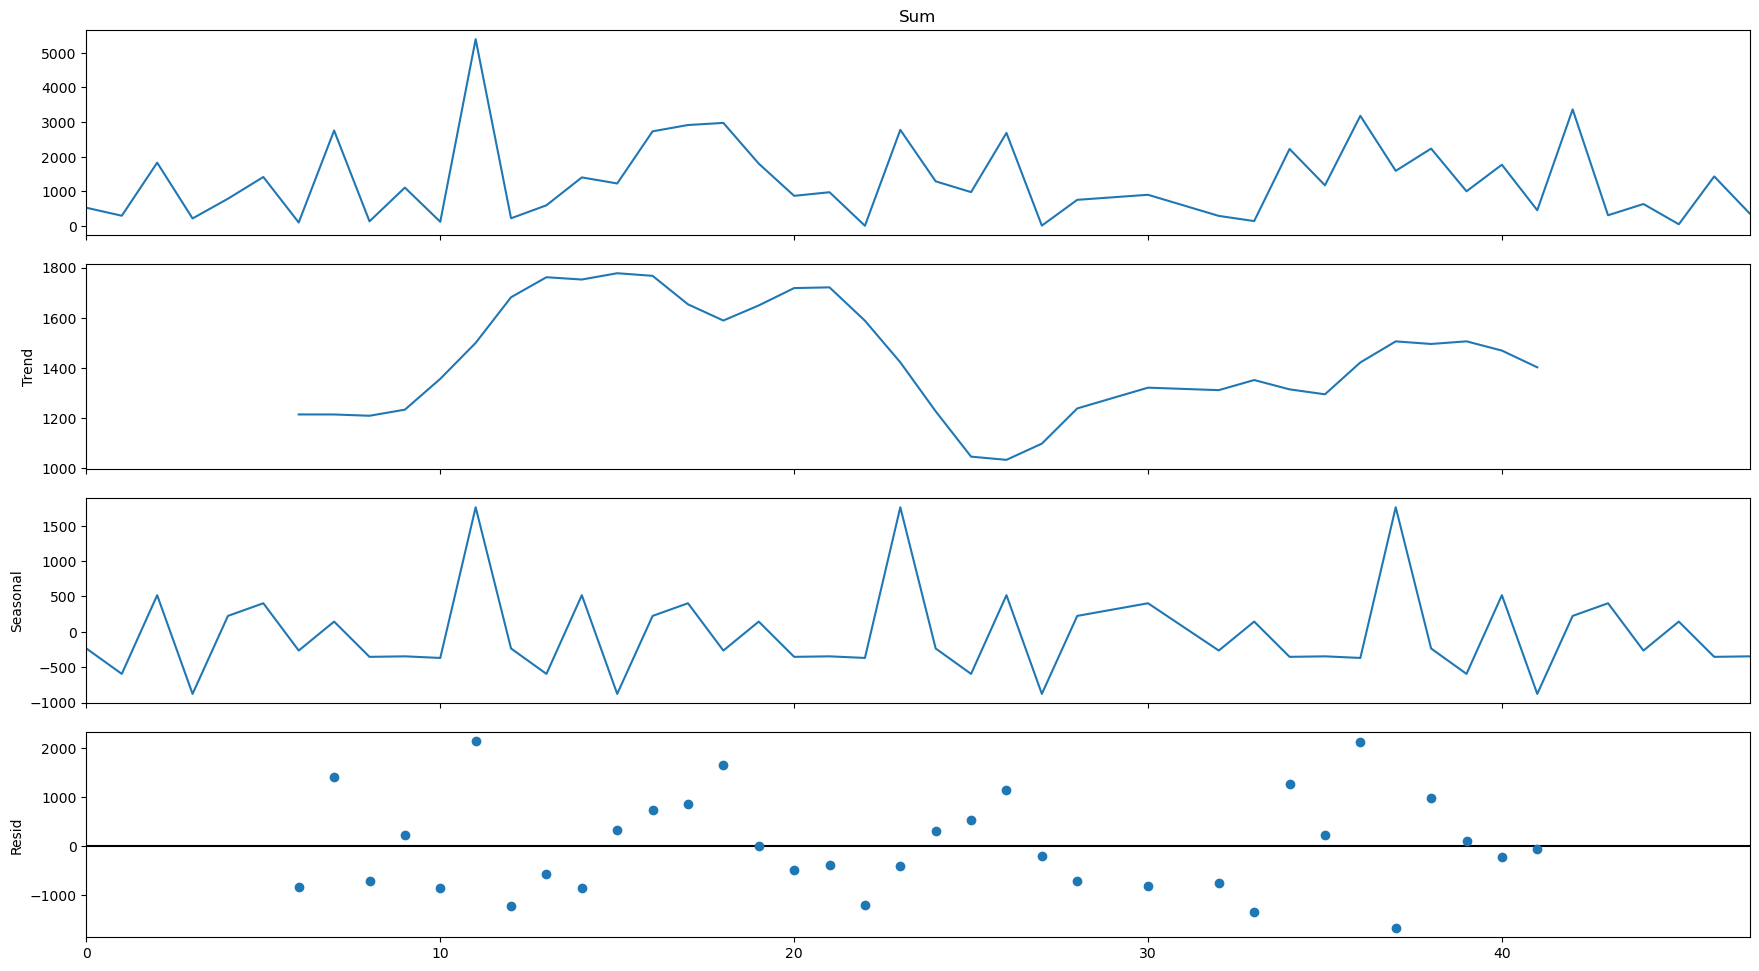

In [53]:
decomp = seasonal_decompose(tdf1['Sum'],
                                   model='additive',
                                   period=12)
fig = decomp.plot()
fig.set_size_inches(18, 10)
plt.show()

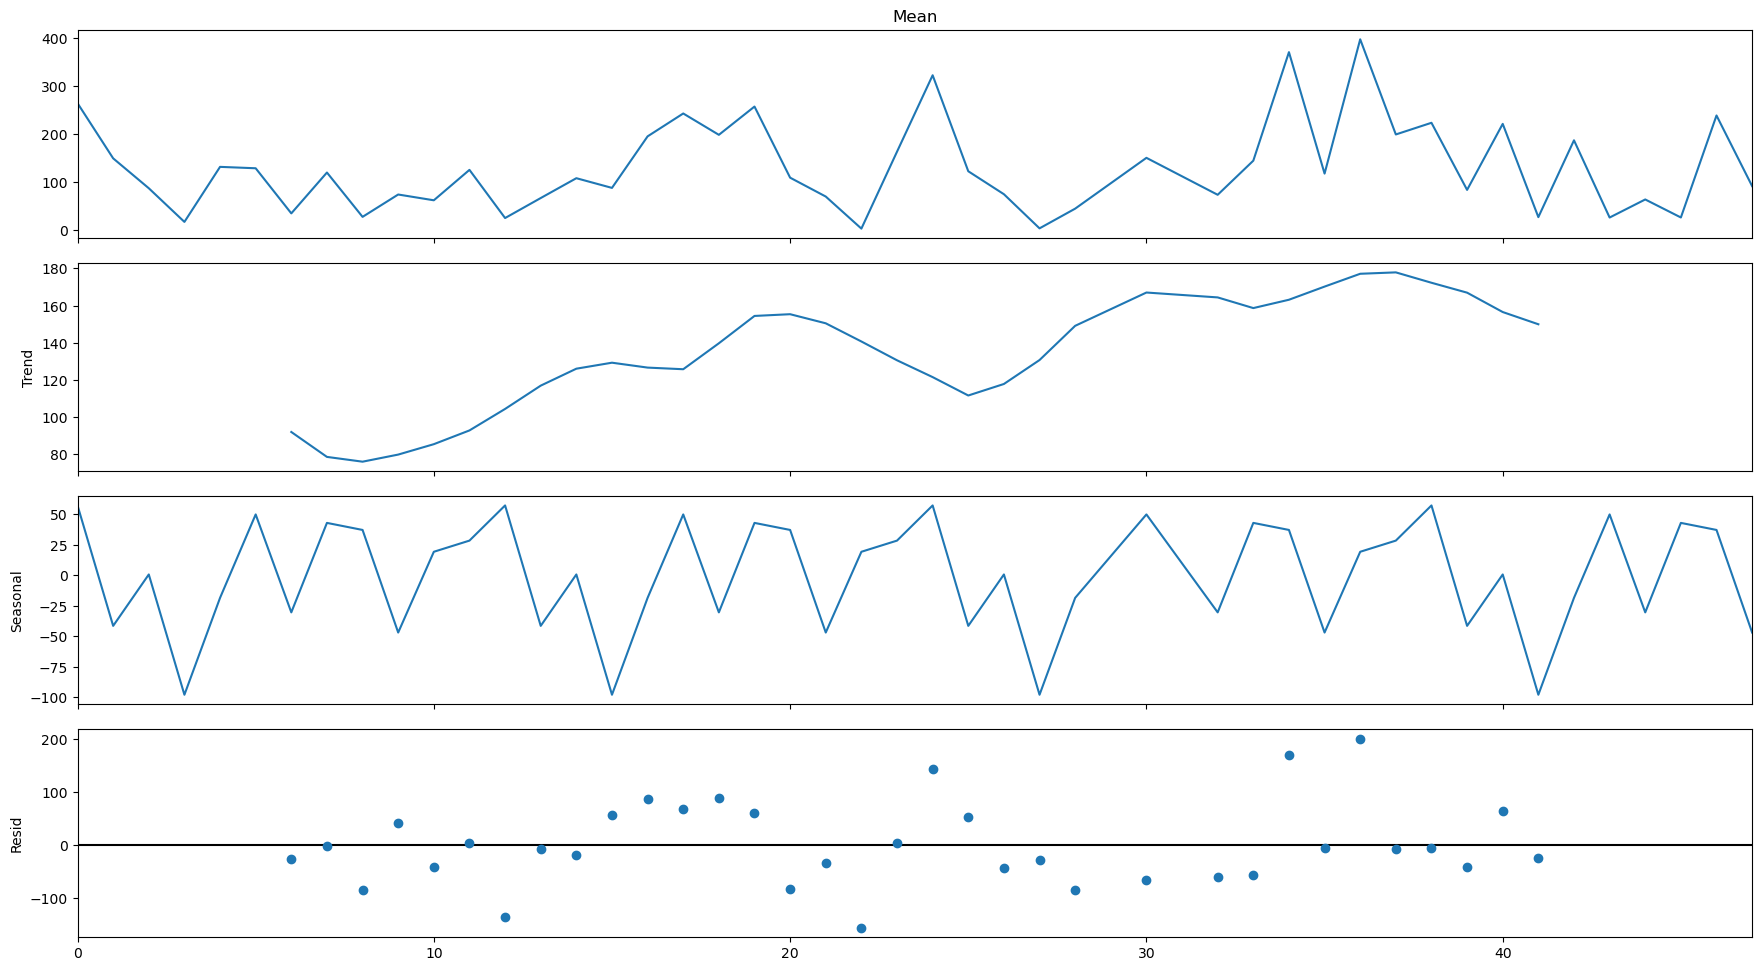

In [57]:
decomp = seasonal_decompose(tdf1['Mean'],
                                   model='additive',
                                   period=12)
fig = decomp.plot()
fig.set_size_inches(18, 10)
plt.show()

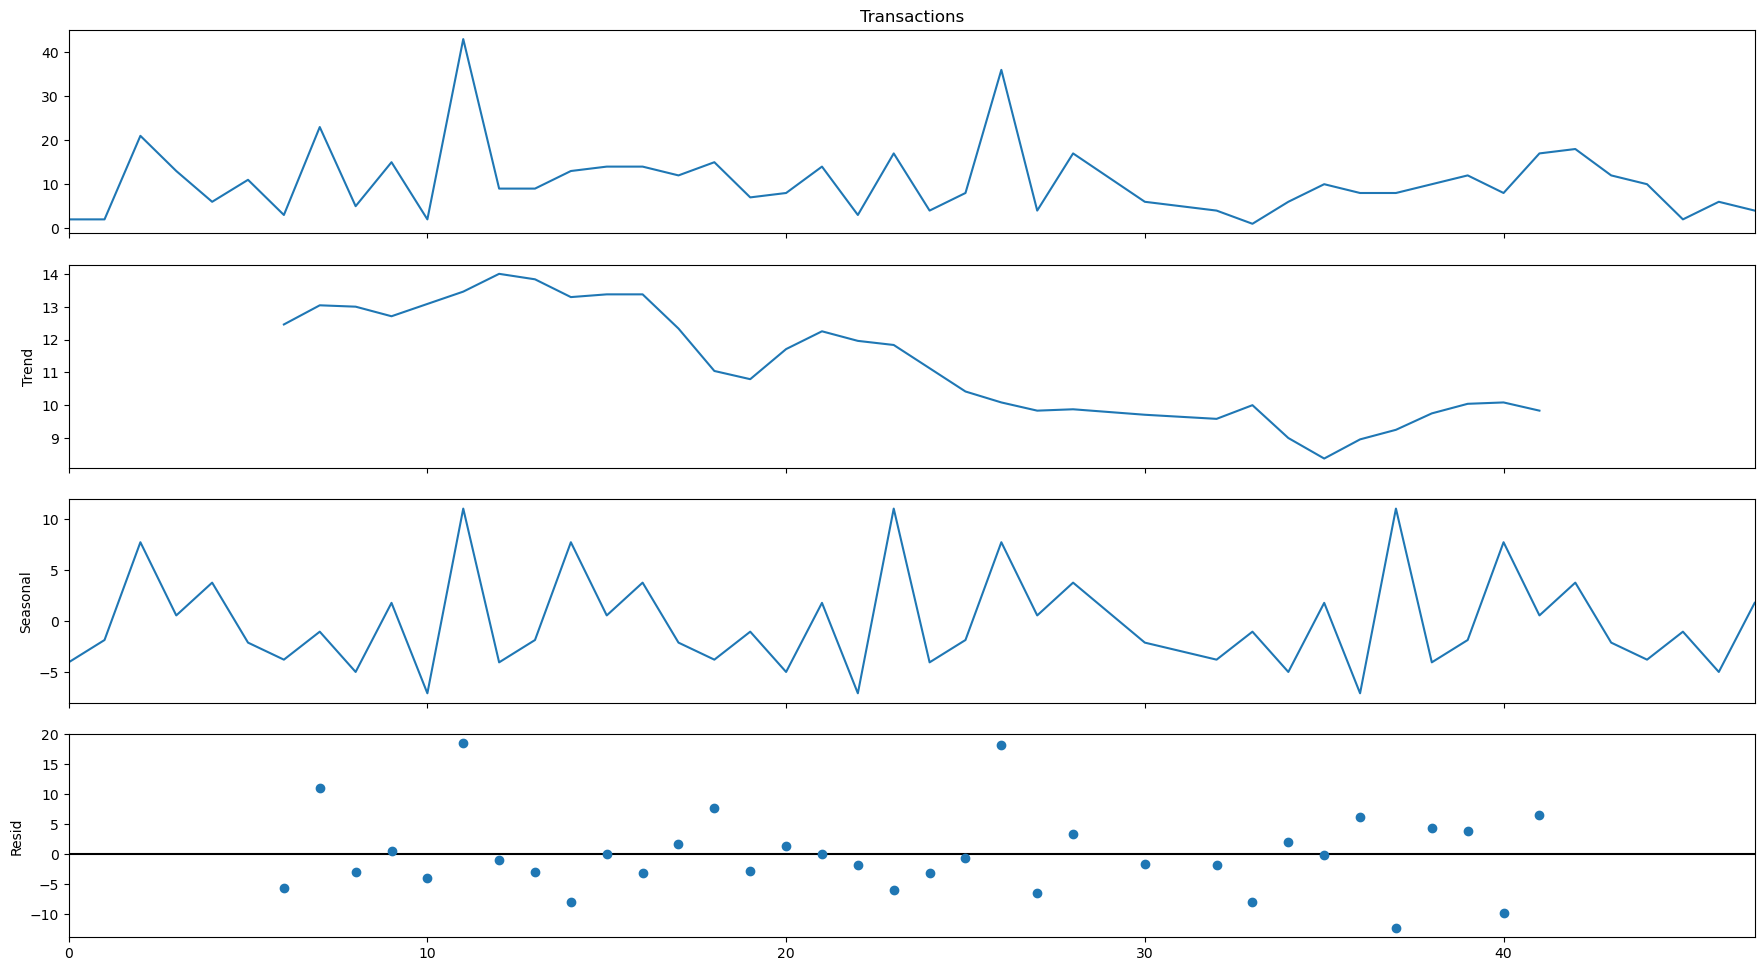

In [62]:
decomp = seasonal_decompose(tdf1['Transactions'],
                                   model='additive',
                                   period=12)
fig = decomp.plot()
fig.set_size_inches(18, 10)
plt.show()

#### d. Class vs Amount Distribution

In [ ]:
# Drop the 'Hour' column, revert back to the original DataFrame

df.drop(columns=['Hour'], inplace=True)

# list(df.columns.values)

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

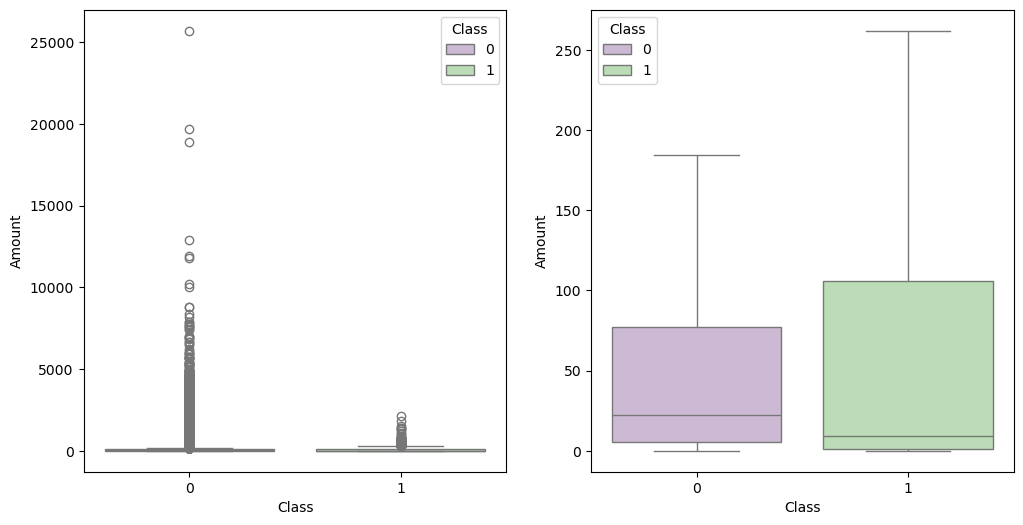

In [64]:
# Transaction amount distribution

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

In [10]:
# How different are the amount of money used in different transaction classes?

fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

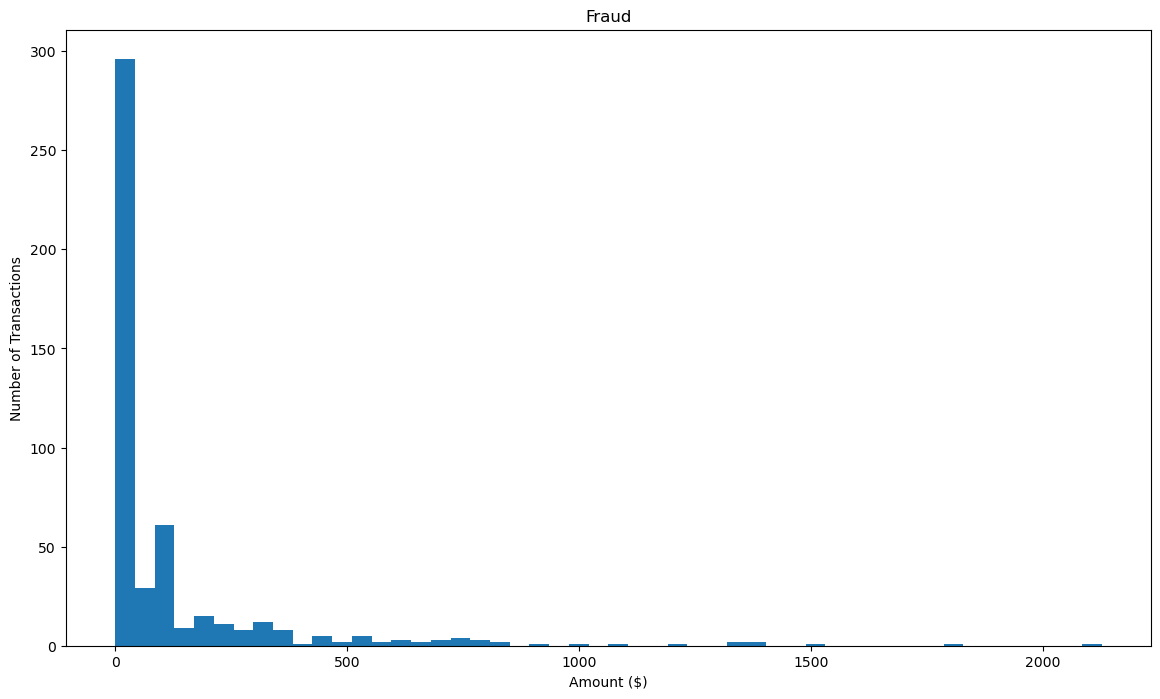

In [ ]:
bins = 50

plt.hist(fraud_df.Amount, bins = bins)
plt.title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show()

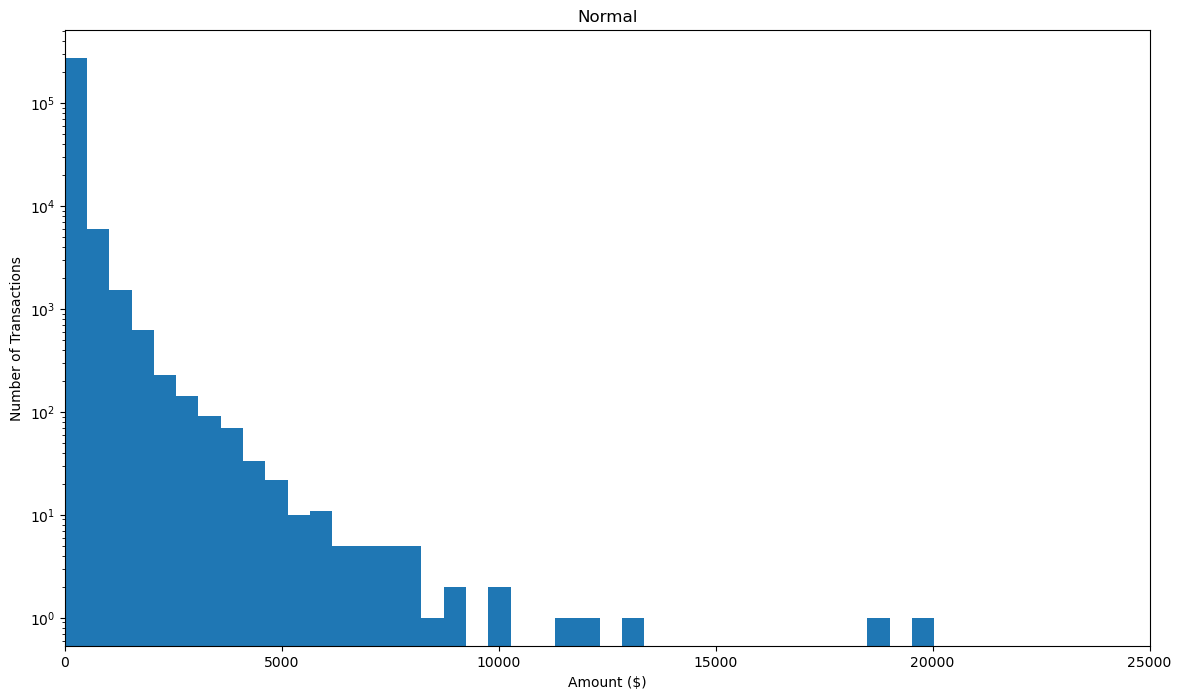

In [18]:

plt.hist(normal_df.Amount, bins = bins)
plt.title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 25000))
plt.yscale('log')
plt.show()

#### e. Feature Correlation

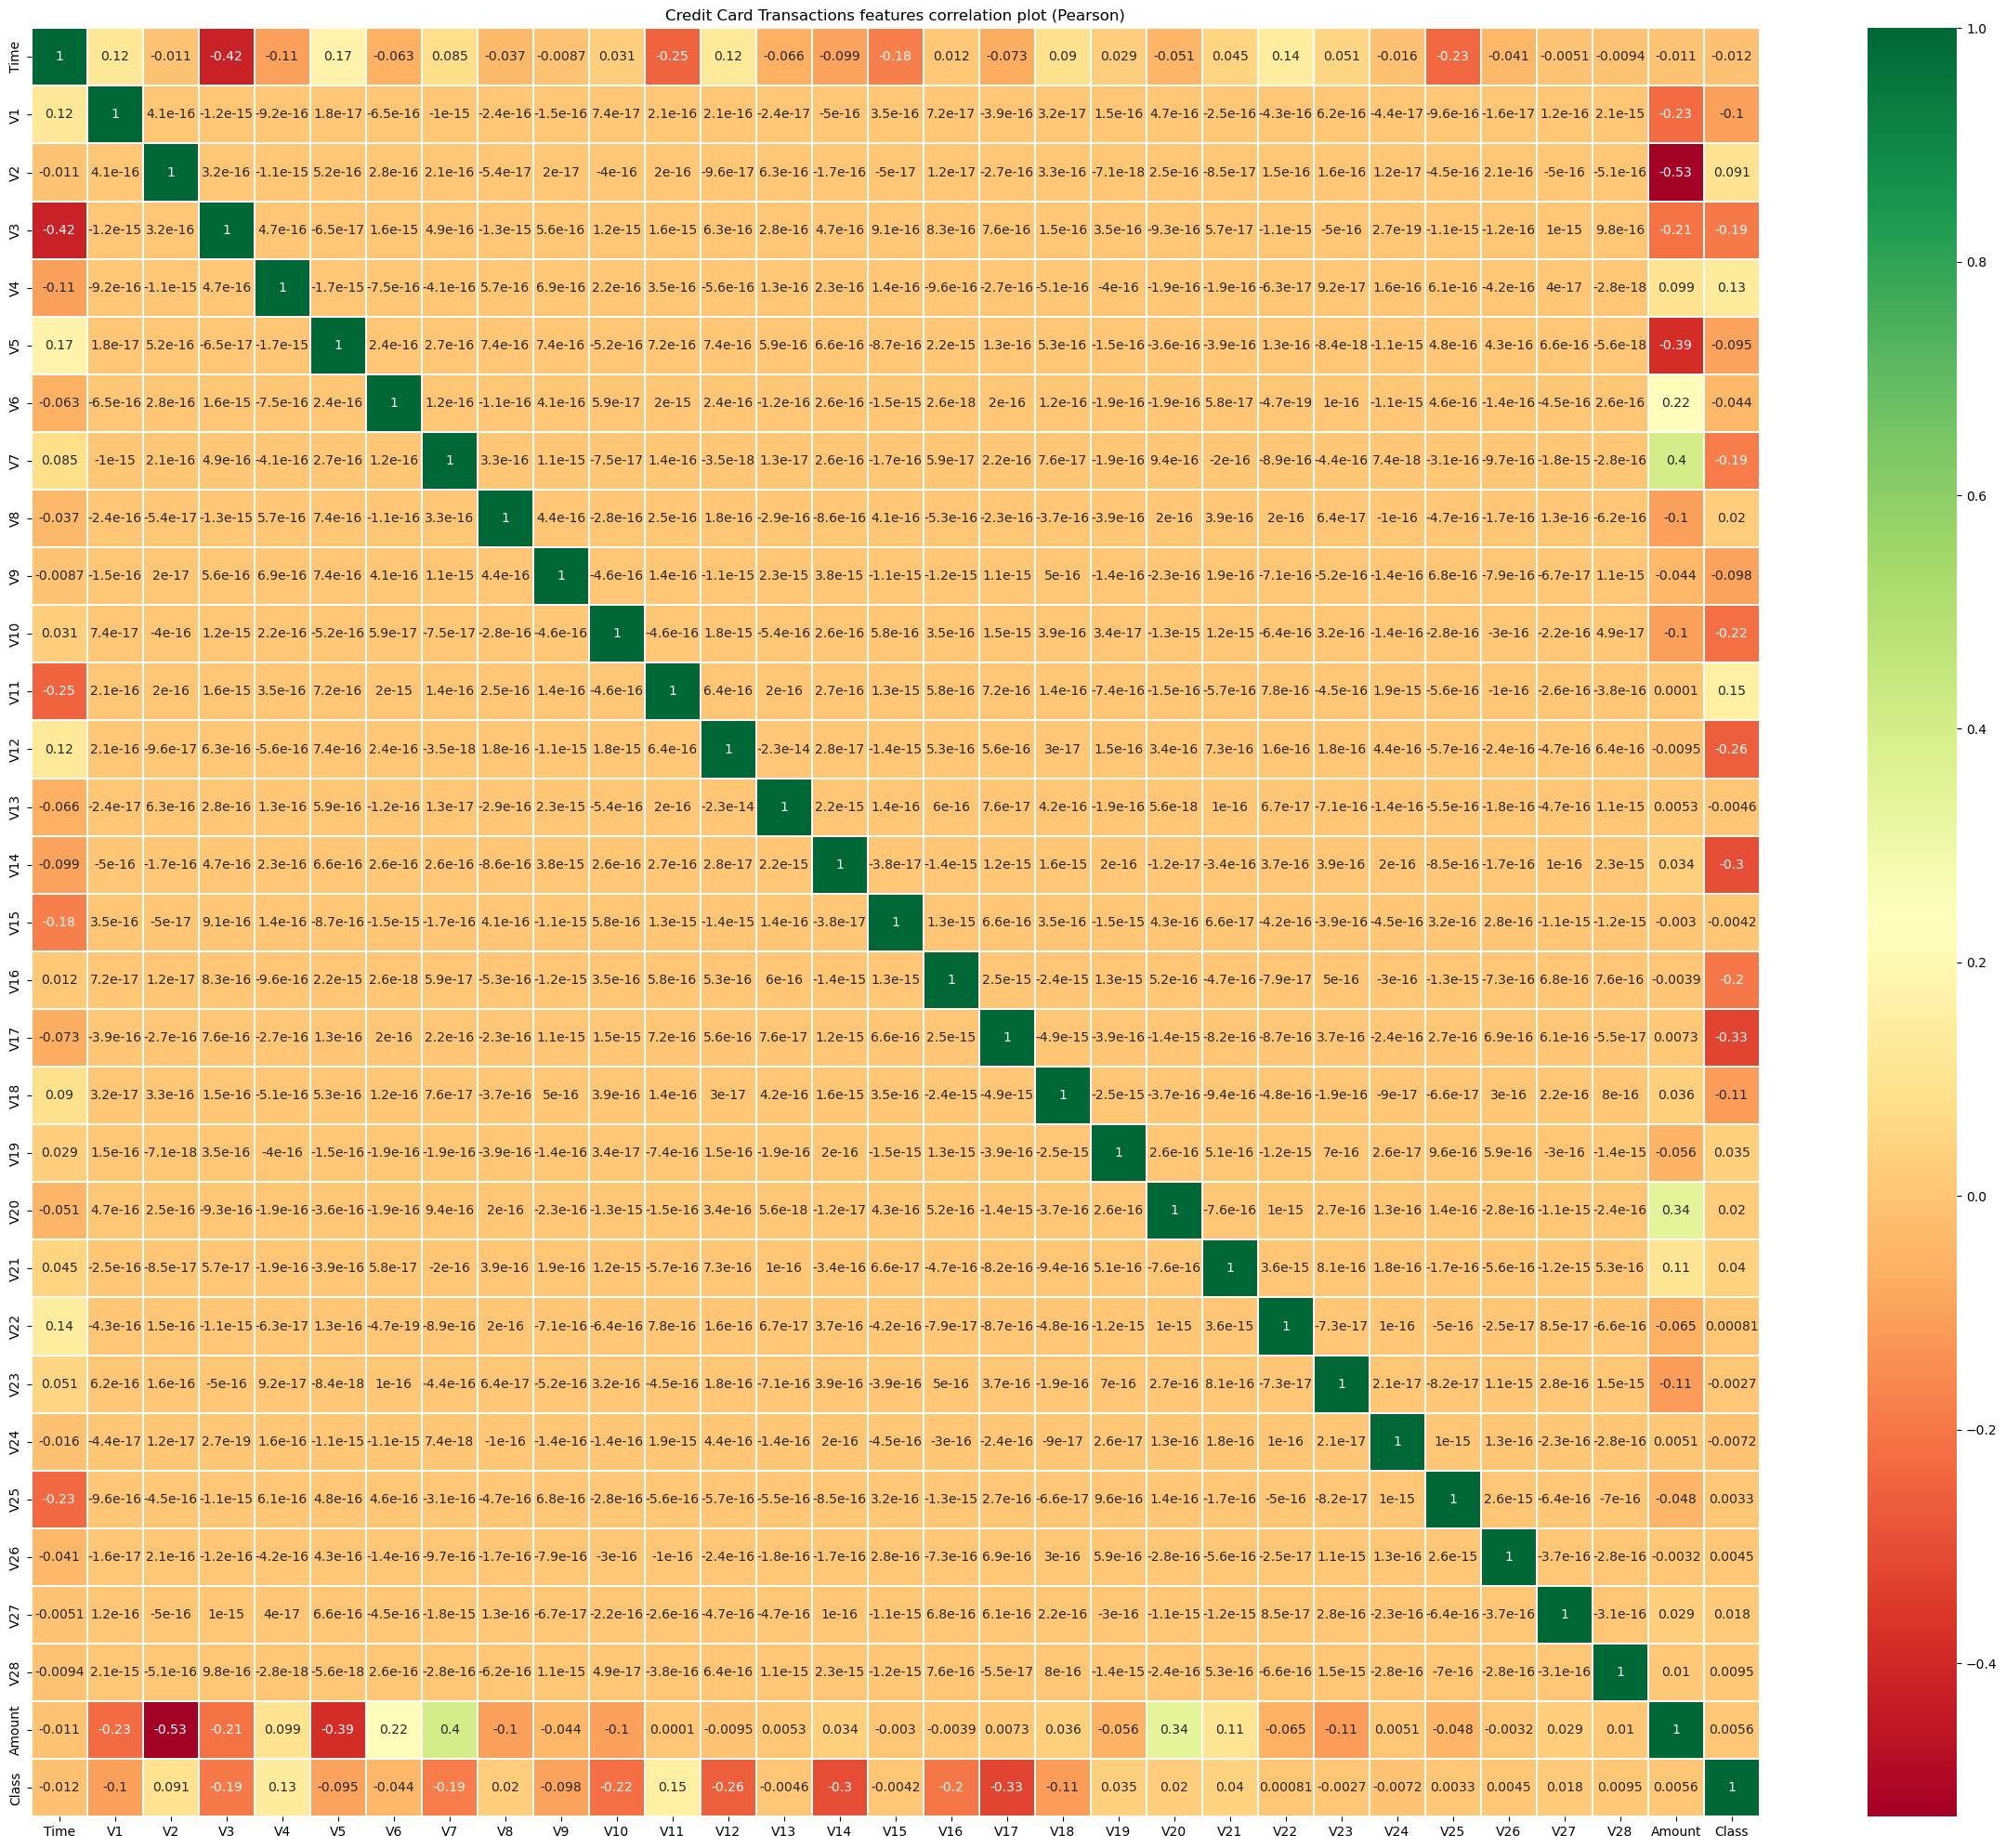

In [70]:
# Features correlation

plt.figure(figsize = (30,25))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="RdYlGn",annot=True)
plt.show()

There is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

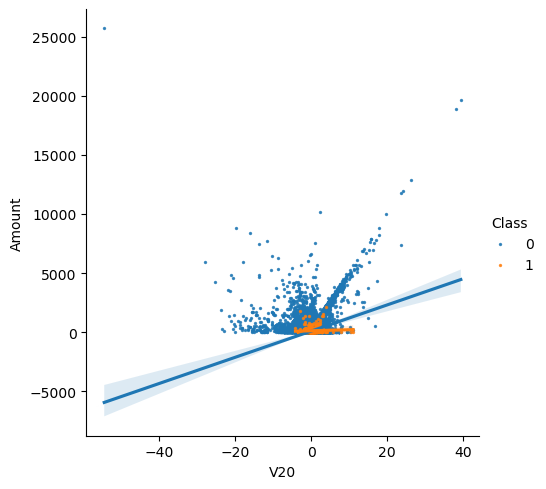

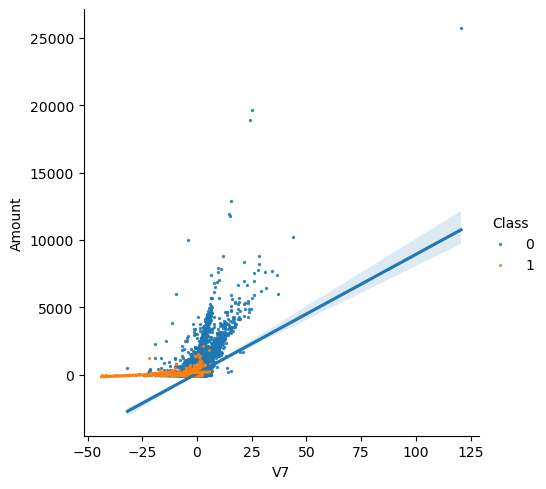

In [72]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2}) # 0.40
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})  # 0.34
plt.show()

The two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

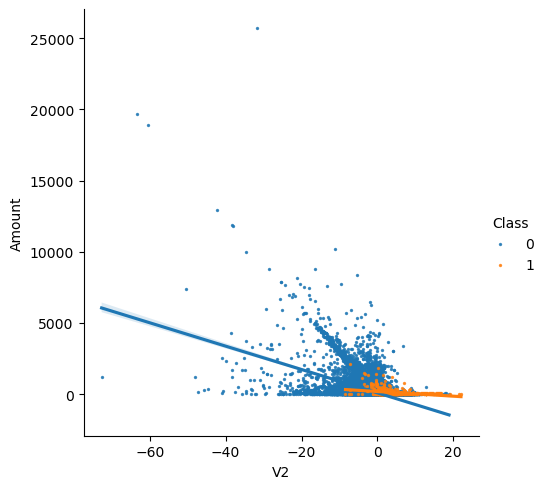

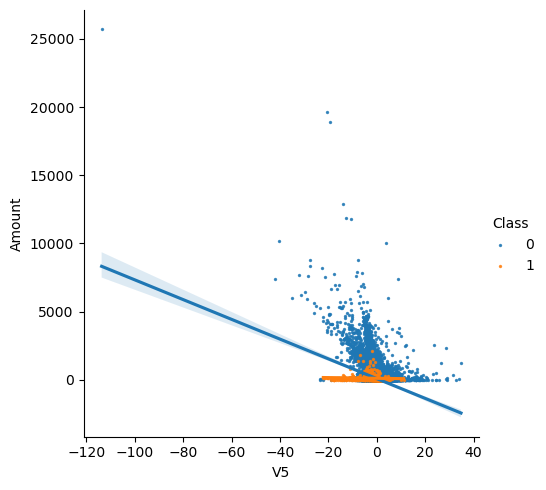

In [74]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})  # -0.53
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})  # -0.39
plt.show()

The two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

### Moving Forward

- [Experimenting with different Classification Techniques for Fraud/Anomaly Detection](#./02_classifier_experiment.ipynb)